<img  src=http://repository.icesi.edu.co/biblioteca_digital/image/icesi-logo.svg height="250" width="250">

**Author: Javier Díaz, Christian Urcuqui**
        

# Programación tradicional vs. aprendizaje automático

Imagínen que ustedes trabajan en el correo, y quieren automatizar el despacho de los paquetes y cartas.

Ya disponen de un software que logra capturar las direcciones y separarlas caracter por caracter en imágenes de 8 píxeles x 8 píxeles en escala de grises, tales que 0 es el negro absoluto, y entre mayor el valor más claro el pixel.

Ese software además puede inferir, según el lugar de los caracteres en la dirección, si cada caracter es una letra o un dígito, pero su labor se termina ahí. 

<img src="Imagen_0_64x64.png">

## Programación tradicional
Ustedes ahora tienen que pensar en 2 programas diferentes: uno que pueda identificar las clases de las imágenes de dígitos (0 a 9) y otro que pueda clasificar los caracteres letra (a-z,A-Z).

Centrémonos en el primer problema de clasificación de imágenes de dígitos.

Consideren que el dataset con las imágenes a tratar ya está disponible en una librería que produce el primer software:

In [20]:
from sklearn.datasets import load_digits
import pylab as pl

Se tienen en total: 1797 imágenes
[[ 0.  0. 12. 10.  0.  0.  0.  0.]
 [ 0.  0. 14. 16. 16. 14.  0.  0.]
 [ 0.  0. 13. 16. 15. 10.  1.  0.]
 [ 0.  0. 11. 16. 16.  7.  0.  0.]
 [ 0.  0.  0.  4.  7. 16.  7.  0.]
 [ 0.  0.  0.  0.  4. 16.  9.  0.]
 [ 0.  0.  5.  4. 12. 16.  4.  0.]
 [ 0.  0.  9. 16. 16. 10.  0.  0.]]


<Figure size 432x288 with 0 Axes>

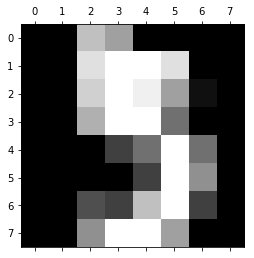

In [21]:
digits = load_digits()
pl.gray() # Queremos las imágenes en grises
pl.matshow(digits.images[5]) # Imprimir una imagen dada
numImagenes = len(digits.images) # Numero de imagenes, len es un método que provee el tamaño del arreglo
print("Se tienen en total:", numImagenes, "imágenes")
print(digits.images[5]) # Ver su representación en pixeles

Después de un proceso de etiquetado manual de varios días, realizado por un estudiante de pregrado en ingeniería de sistemas, en el que manualmente se clasificaron las imágenes una a una, se pudo obtener un *ground truth* con las clases reales de cada imagen.

Las etiquetas de las imágenes que indican el dígito real se encuentran disponibles:

In [25]:
y = digits.target # el método nos provee las etiquetas de las imágenes en un arreglo
print(y[66])

6


Para poder simplificar la representación de los datos, se pueden aplanar las matrices de pixeles para poner cada imagen en un solo array de 64 pixeles:

In [26]:
X = digits.images.reshape((numImagenes, -1)) # se reducen las dimensiones
print(X[25])

[ 0.  0. 12.  8.  8.  7.  0.  0.  0.  3. 16. 16. 11.  7.  0.  0.  0.  2.
 14.  1.  0.  0.  0.  0.  0.  5. 14.  5.  0.  0.  0.  0.  0.  2. 15. 16.
  9.  0.  0.  0.  0.  0.  0.  2. 16.  2.  0.  0.  0.  0.  4.  8. 16.  4.
  0.  0.  0.  0. 11. 14.  9.  0.  0.  0.]


**Traten de pensar en un programa tradicional que les permita clasificar cualquier imágen de números en el dígito correspondiente.**

...

...

## Aprendizaje automático

Con un modelo de **machine learning** se puede realizar esta tarea de una manera bastante sencilla.

In [80]:
#from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
import pylab as plt

gnb = GaussianNB()
fit = gnb.fit(X, y)

Se pueden evaluar las clases estimadas por el modelo vs. las clases reales

In [81]:
y_estimado = fit.predict(X)
print("Reales   :", y[0:25])
print("Estimados:", y_estimado[0:25])

Reales   : [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4]
Estimados: [0 1 8 3 4 9 6 7 8 9 0 1 2 3 4 5 6 7 7 3 0 1 2 3 4]


Podemos tener una idea más clara de los casos en los que se equivoca el modelo:

In [83]:
images_and_predictions = list(zip(digits.images, y_estimado))
for index, (image, prediction) in enumerate(images_and_predictions[:15]):
    plt.subplot(3,5, index+1) #se crean los placeholders de 3x5 filasXcolumnas
    plt.axis('off')  #se quitan los ejes
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('Pred: %i' % prediction)
plt.show()

TypeError: 'list' object is not callable

Nos gustaría tener una idea de la correctitud global del modelo aprendido.

In [70]:
metrics.accuracy_score(y, y_estimado)

0.8580968280467446

## Tarea 

Previamente hemos podido utilizar las herramientas de sklearn para cargar las imágenes del dataset notMNIST, a través de pylab visualizamos una muestra y finalmente utilizamos un primer algoritmo de machine learning (Naive Bayes) para el entrenamiento y la predicción de un conjunto de imágenes.

Su trabajo es aplicar un método de programación tradicional, es decir, sin usar modelos basados en machine learning. El método debe estar en la capacidad de identificar la etiqueta (el número asignado a la imagen) del conjunto de NotMNIST.

Cada pareja de estudiantes se debe encargar de predecir 2 dígitos, específicamente, cada grupo debe seleccionar entre las siguientes opciones de dígitos:

+ 1 y 5
+ 8 y 2
+ 9 y 7
+ 0 y 3
+ 4 y 6

Finalmente, una vez implementado el método, responda la siguiente pregunta, ¿Cuánto fue la exactitud de su método?


In [27]:
y=digits.target #aquí se obtienen las etiquetas de los dígitos
list = [] #lista donde van a almacenar las imagenes 
for i in range(0,len(y)):
    if(y[i] == 0):
        list.append(digits.images[i])
        



 #for p in list:
 #   pl.matshow(p)
    
    #En este metodo identificamos si en la parte superior de la matriz 
    #tiene la forma de un cero verificando que haya una linea continua de blancos
    
def identifyZeroTop (digitos):
    top=digitos[0:2]
    count=0
    errorCount=0
    
    for fila in range(0,len(top)): 
        for num in range(1,7) :
            if(top[0,num]==0.0):
                count+=1
            if(count==2):
                errorCount+=1
           
    if(errorCount>=2):
        return False
    else:
        return True
    #En este metodo identificamos si en la parte inferior de la matriz 
    #tiene la forma de un cero verificando que haya una linea continua de blancos
def identifyZeroBot (digitos):
    bottom=digitos[6:8]
    
    count=0
    errorCount=0
    
    for fila in range(0,len(bottom)): 
        for num in range(1,7) :
            if(bottom[0,num]==0.0):
                count+=1
            if(count==2):
                errorCount+=1
           
    if(errorCount>=2):
        return False
    else:
        return True
    #En este metodo identificamos si en la parte izquierda de la matriz 
    #tiene la forma de un cero verificando que haya una linea continua de blancos    

def identifyZeroLeft(digitos):
    left1=[row[1] for row in digitos]
    left2=[row[2] for row in digitos]
   
    errorCount=0
    count=0
    for num in range(1,8) :
        if(left1[num]==0.0):
            count+=1
        if(count==2):
            errorCount+=1
        else:
            count=0
    count=0
    for num in range(1,8) :
        if(left2[num]==0.0):
            count+=1
        if(count==2):
            errorCount+=1
        
            
    if(errorCount>=2):
        return False
    else:
        return True
   #En este metodo identificamos si en la parte derecha de la matriz 
    #tiene la forma de un cero verificando que haya una linea continua de blancos
    
def identifyZeroRight(digitos):
    right1=[row[5] for row in digitos]
    right2=[row[6] for row in digitos]
    
    errorCount=0
    count=0
    for num in range(1,8) :
        if(right1[num]==0.0):
            count+=1
        if(count==2):
            errorCount+=1
        
    count=0
    
    for num in range(1,8) :
        if(right1[num]==0.0):
            count+=1
        if(count==2):
            errorCount+=1
            
    if(errorCount>=2):
        return False
    else:
        return True
    
   #Este método una la verificación de los métodos que identifican por cuadrantes el cero

def identifyZero(digitos):
    isZero=identifyZeroTop(digitos)&identifyZeroBot(digitos)&identifyZeroLeft(digitos)&identifyZeroRight(digitos)
    return isZero


#Este metodo se encarga de sacar la probabilidad de coincidencia de las matrices

def probabilidad():
    count=0
    for zero in list:
        
        if(identifyZero(zero)):
            count+=1
    return (count/len(list))*100   

print(probabilidad())


51.12359550561798


55.73770491803278
0.07679465776293823


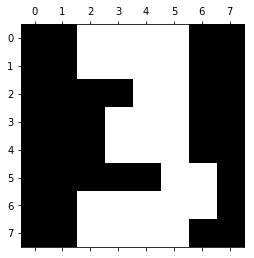

In [49]:
y=digits.target #aquí se obtienen las etiquetas de los dígitos
list = [] #lista donde van a almacenar las imagenes 

#esta función agrega en una lista las matrices que representan al número 3
for i in range(0,len(y)):
    if(y[i] == 3):
        list.append(digits.images[i])
        

matrizPromedio= [[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]]      
incidencia=27    
    
    #Este metodo genera una matriz promedio a partir de todas las matrices que representan los números tres
    #y retorna una matriz que se concidera un promedio de todas las matrices que hay.
def sacarMatrizPromedio():
    listMatriz=[[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]]
    for k in list:
        listMatriz=k
        for i in range(8):
            for j in range(8):
                matrizPromedio[i][j]+= listMatriz[i][j]/len(list)
                
    for i in range(8):
        for j in range(8):
            if(matrizPromedio[i][j]<6):
                matrizPromedio[i][j]=0
            else:
                matrizPromedio[i][j]=16
    pl.matshow(matrizPromedio)

    
    # Este método permite comparar una matrizEntrante con la matriz promedio y comparando 55 espacios de cada matriz
def compararMatriz(matrizEntrante):
    for i in range(8):
        for j in range(8):
            if(matrizEntrante[i][j]<6):
                matrizEntrante[i][j]=0
                
            else:
                matrizEntrante[i][j]=16
    match=0
    for i in range(8):
        for j in range(8):
            if(matrizEntrante[i][j]==matrizPromedio[i][j]):
                   match=match+1
                
    if(match>55):        
        return True

    
    #Este metodo calcula la probabilidad dentro de la lista de matrices que solo representa al número tres
def probabilidad():
    count=0
    for tres in list:
        
        if(compararMatriz(tres)):
            count+=1
    return (count/len(list))*100

    #Este metodo calcula la probabilidad dentro de la lista que posee las matrices que representan a todos los numeros
def probabilidadTotal():
    count=0
    for tres in digits.images:
        
        if(compararMatriz(tres)):
            count+=1
    return (count/len(digits.images))

sacarMatrizPromedio()

print(probabilidad())
print(probabilidadTotal())